# Air pollution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
train

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test = pd.read_csv("Test.csv")
test

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,ZZDJZMS X 2020-03-31,2020-03-31,ZZDJZMS,9.400001,86.200005,0.00413,3.136346,0.073416,0.923135,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16132,ZZDJZMS X 2020-04-01,2020-04-01,ZZDJZMS,17.000000,90.300003,0.00548,6.394495,-1.217649,1.270308,0.000000,...,56.377846,45.983723,40.416741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16133,ZZDJZMS X 2020-04-02,2020-04-02,ZZDJZMS,19.170641,86.200005,0.00656,9.750879,-0.410603,0.754363,0.000000,...,27.089602,-152.281488,41.202583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16134,ZZDJZMS X 2020-04-03,2020-04-03,ZZDJZMS,8.400001,66.400002,0.00457,8.322565,1.659441,-2.471616,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [4]:
example = pd.read_csv("SampleSubmission.csv")
example

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,0
1,0OS9LVX X 2020-01-03,0
2,0OS9LVX X 2020-01-04,0
3,0OS9LVX X 2020-01-05,0
4,0OS9LVX X 2020-01-06,0
...,...,...
16131,ZZDJZMS X 2020-03-31,0
16132,ZZDJZMS X 2020-04-01,0
16133,ZZDJZMS X 2020-04-02,0
16134,ZZDJZMS X 2020-04-03,0


# Exploratory data analysis

Check if there are nan values in the train set 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

<AxesSubplot:>

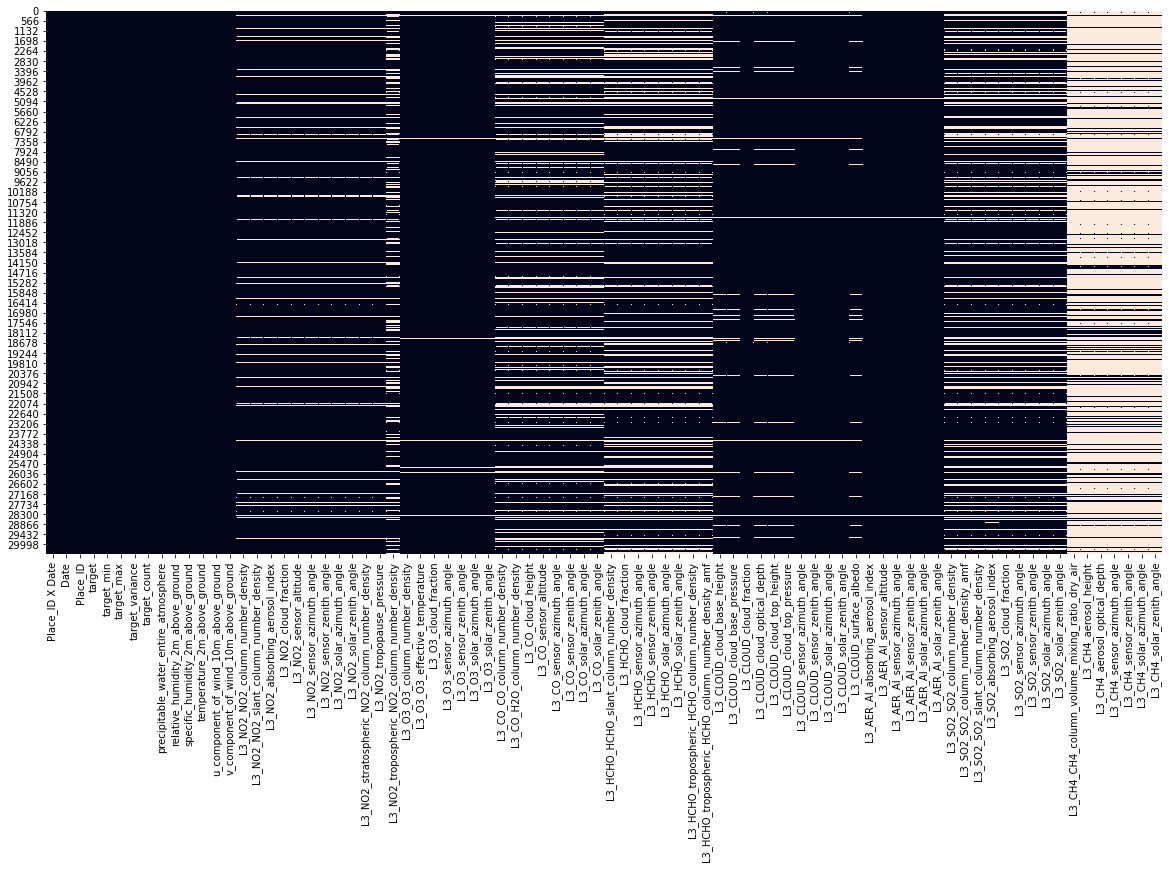

In [6]:
# The number of NAN
plt.figure(figsize = (20,10))
sns.heatmap(train.isna(), cbar = False) # Nan or not with seaborn

In [7]:
df = train.copy()
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.set_option('display.max_row', 82)
(df.isna().sum()/df.shape[0]).sort_values()*100 # sum of nan for each column

Place_ID X Date                                         0.000000
v_component_of_wind_10m_above_ground                    0.000000
u_component_of_wind_10m_above_ground                    0.000000
temperature_2m_above_ground                             0.000000
specific_humidity_2m_above_ground                       0.000000
relative_humidity_2m_above_ground                       0.000000
target_count                                            0.000000
precipitable_water_entire_atmosphere                    0.000000
target_max                                              0.000000
target_min                                              0.000000
target                                                  0.000000
Place_ID                                                0.000000
Date                                                    0.000000
target_variance                                         0.000000
L3_AER_AI_sensor_altitude                               0.644697
L3_AER_AI_solar_azimuth_a

In [9]:
# Drop the columns with % of NAN > 80%
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.8]]
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,48.459205,0.000107,0.263715,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,47.292238,0.000014,0.546447,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537


<AxesSubplot:>

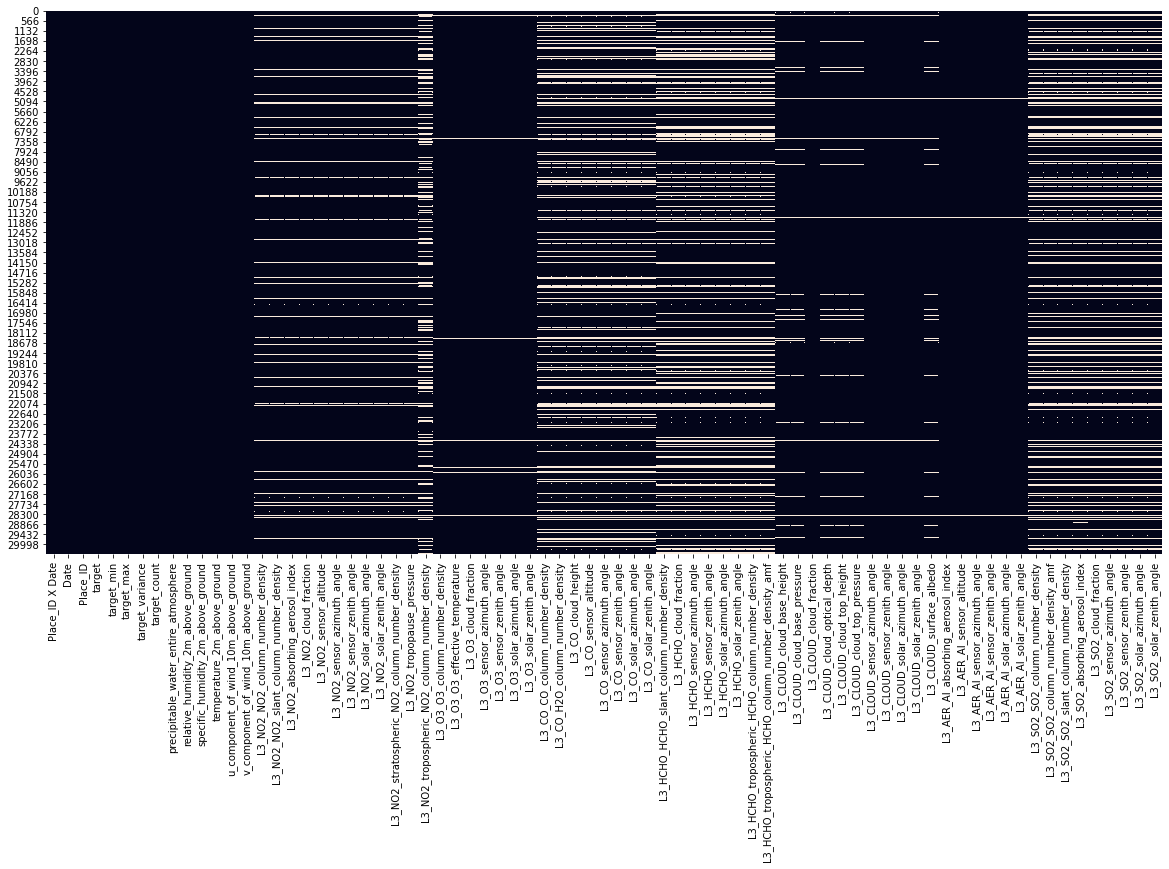

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(), cbar = False) # Nan or not with seaborn

# EDA

float64    71
object      3
int64       1
dtype: int64

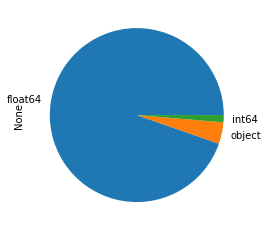

In [11]:
df.dtypes.value_counts().plot.pie()
df.dtypes.value_counts()# Type de variables

/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


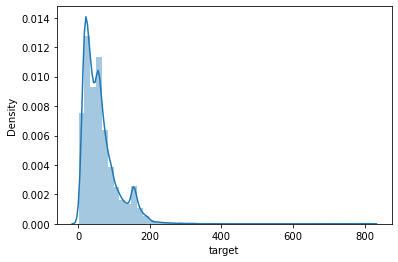

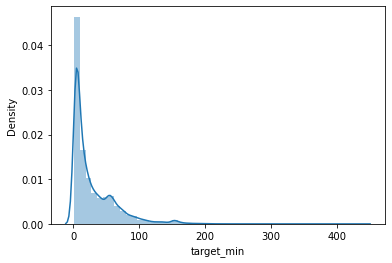

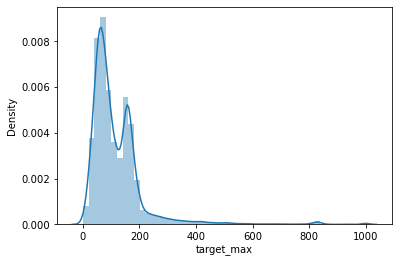

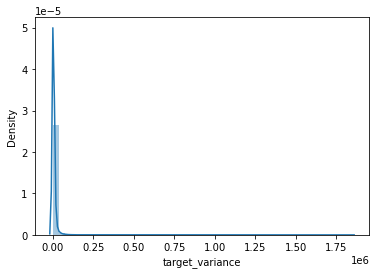

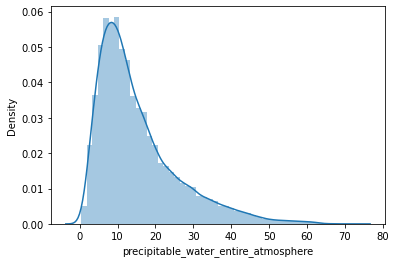

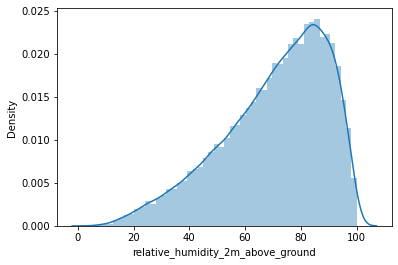

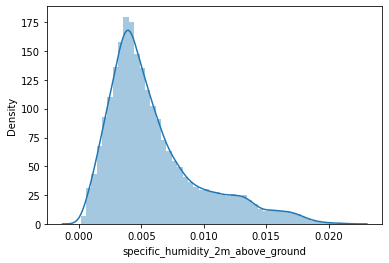

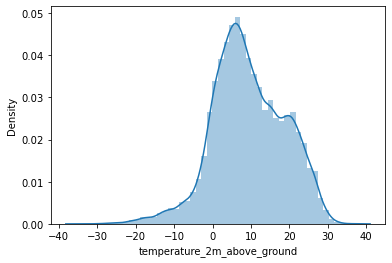

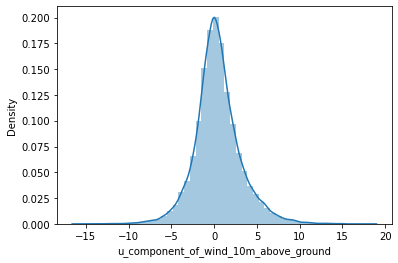

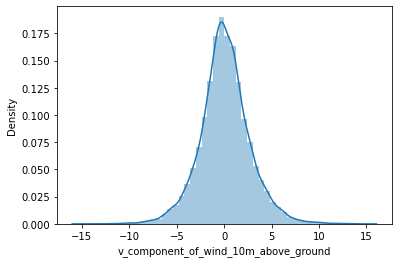

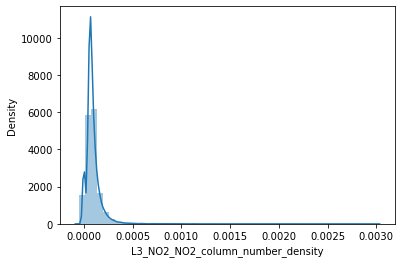

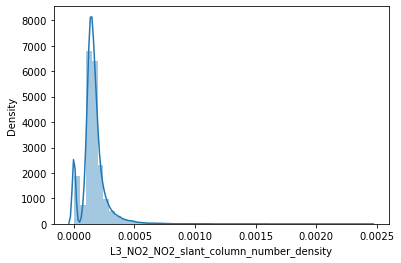

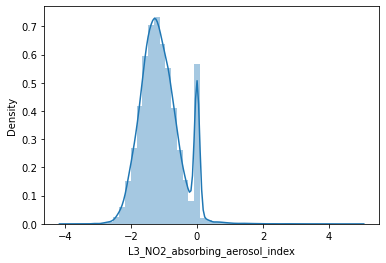

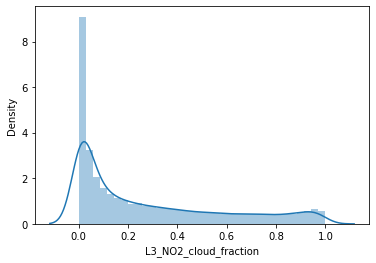

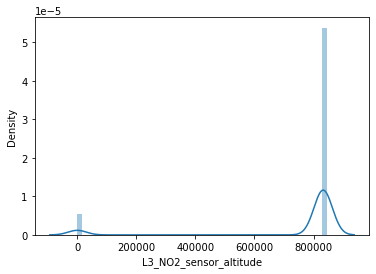

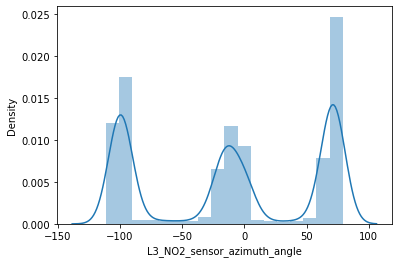

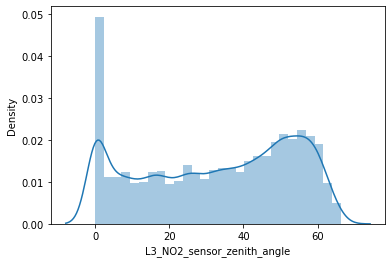

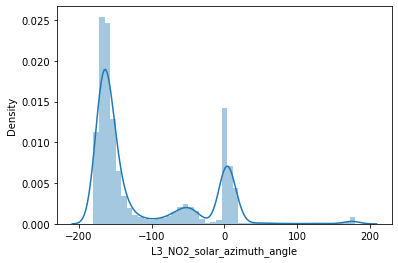

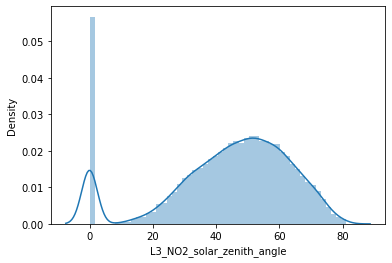

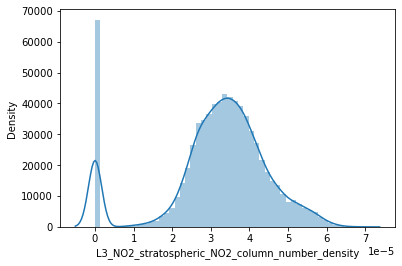

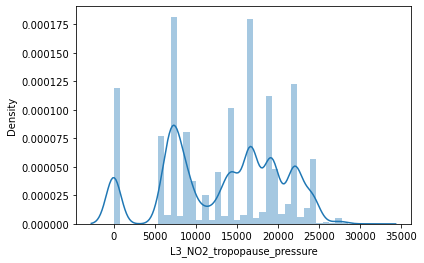

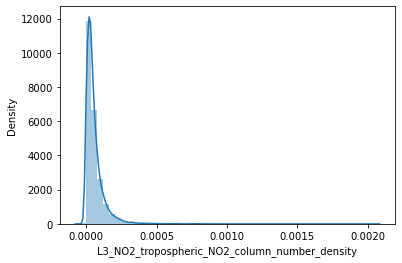

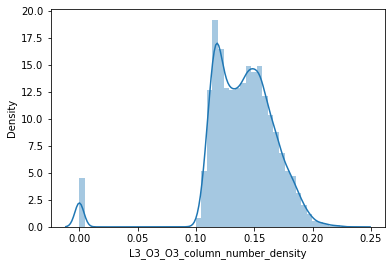

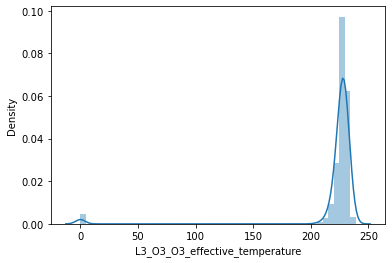

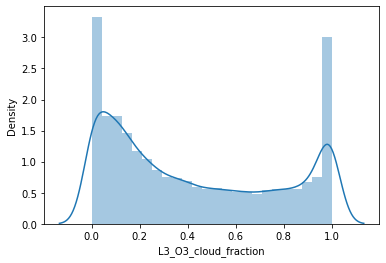

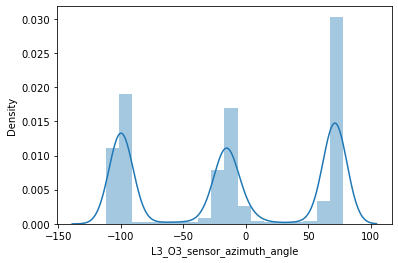

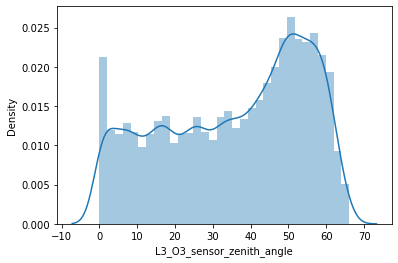

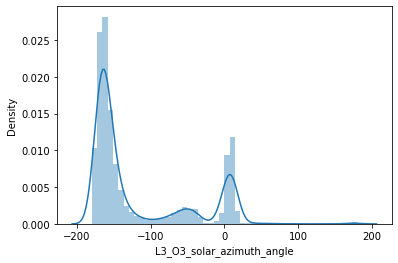

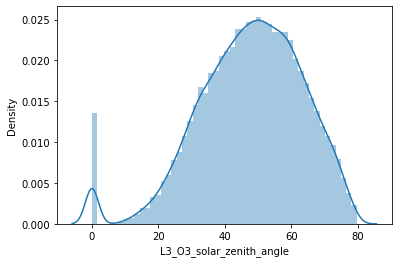

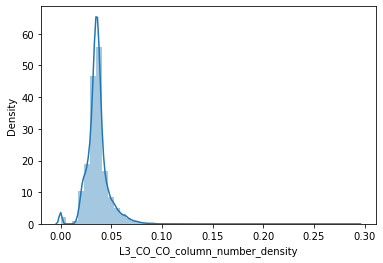

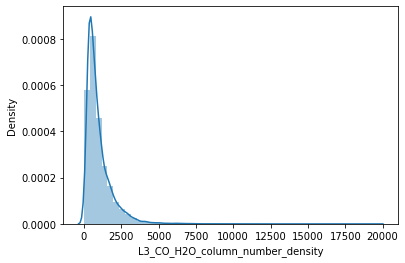

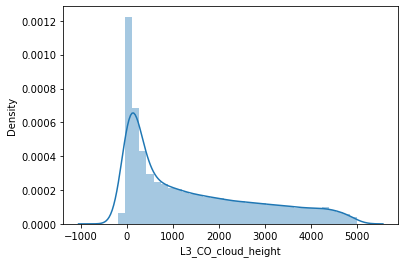

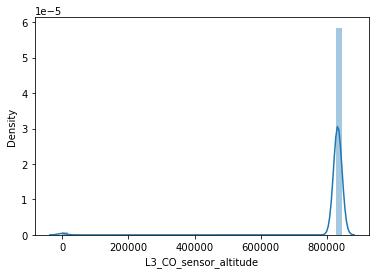

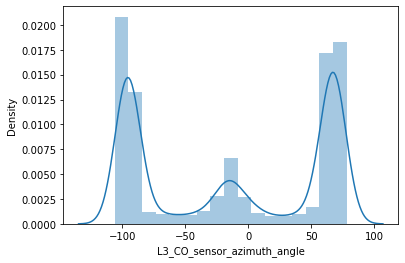

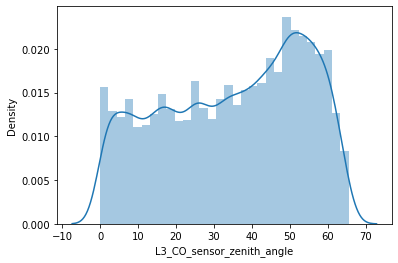

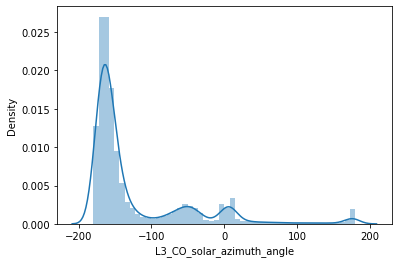

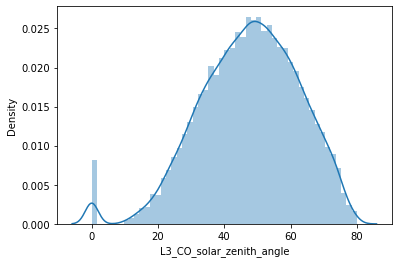

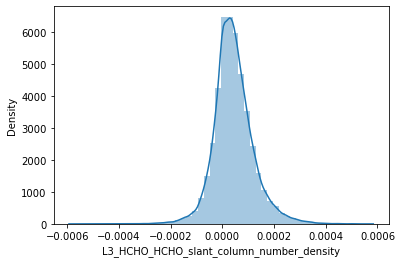

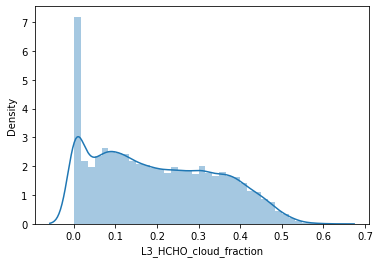

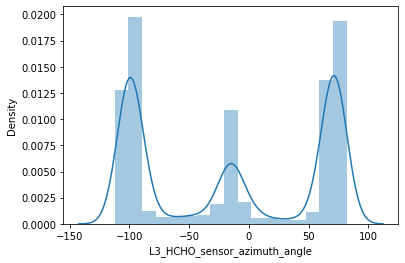

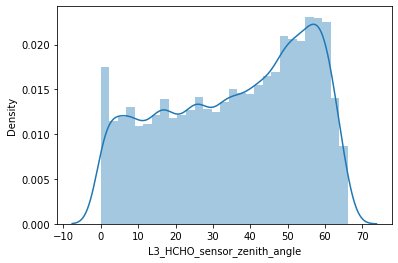

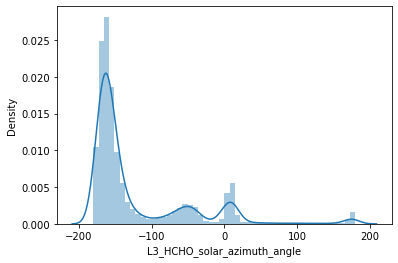

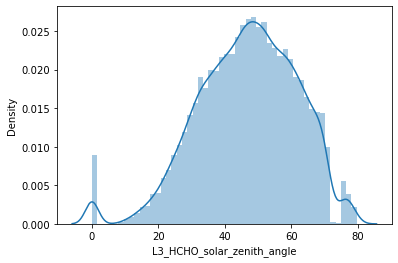

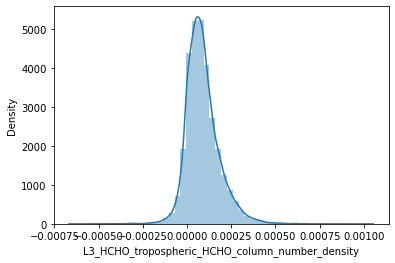

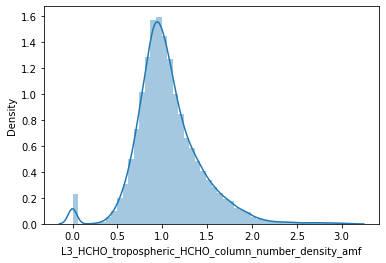

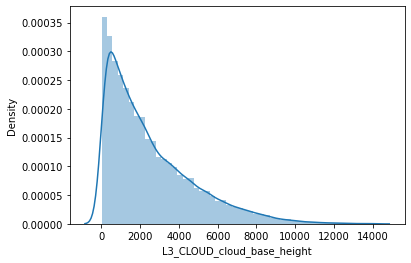

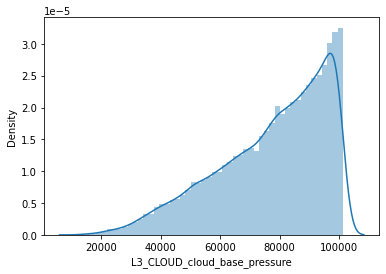

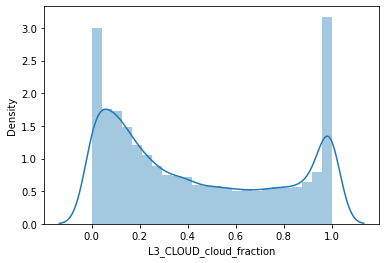

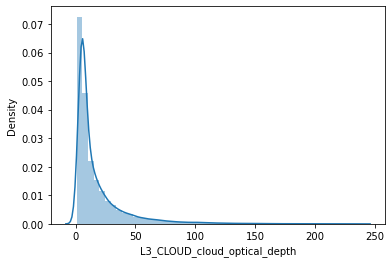

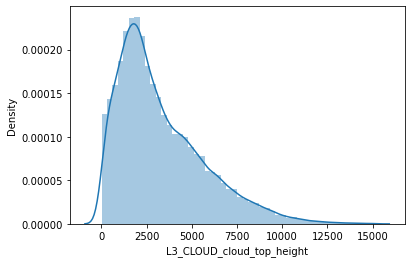

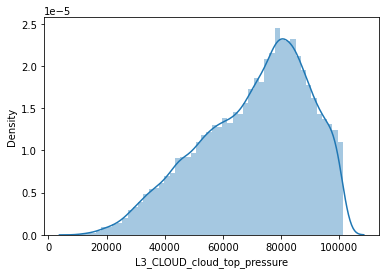

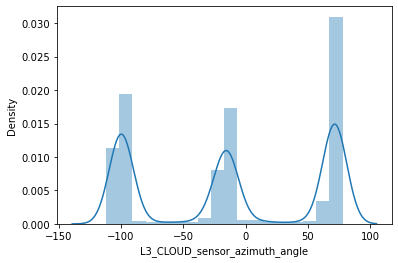

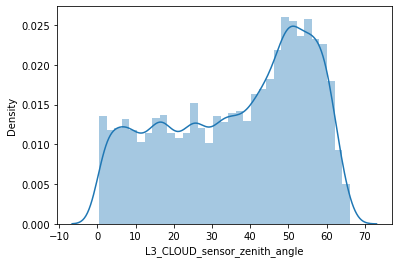

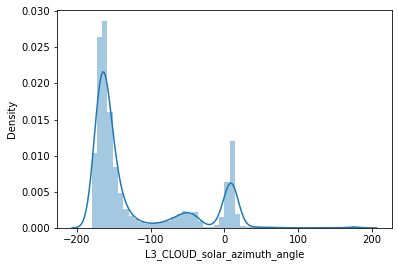

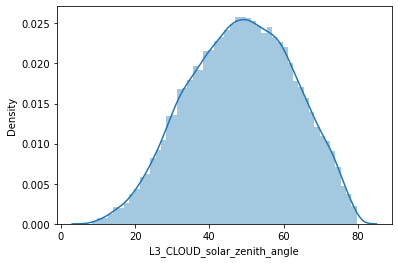

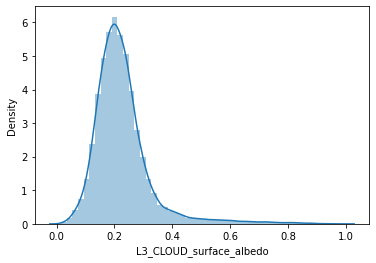

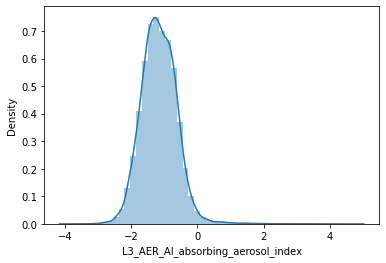

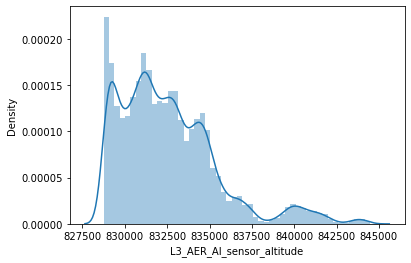

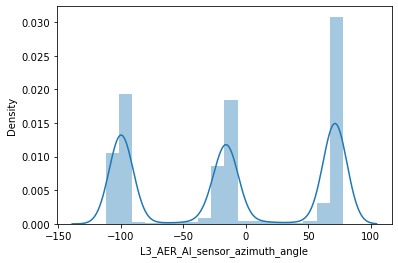

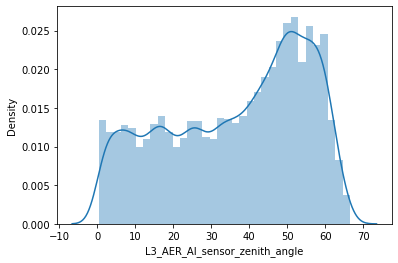

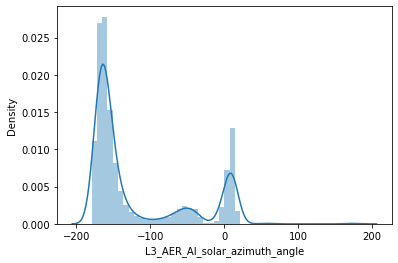

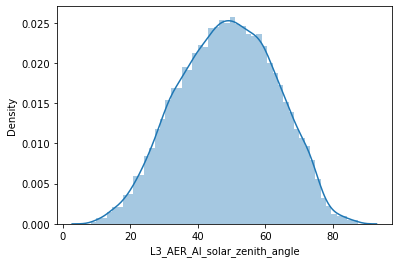

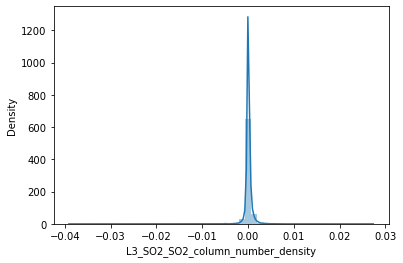

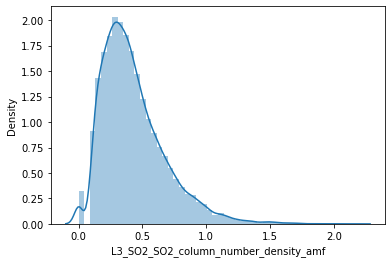

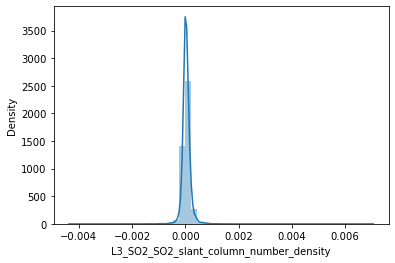

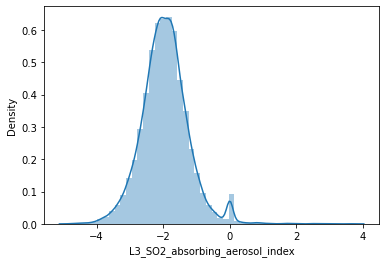

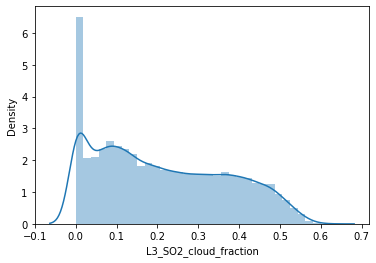

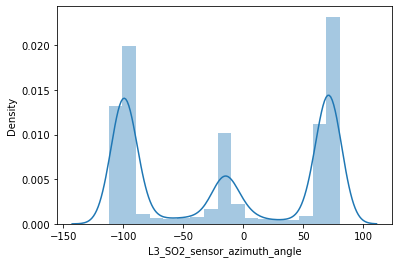

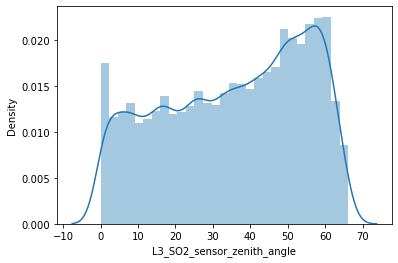

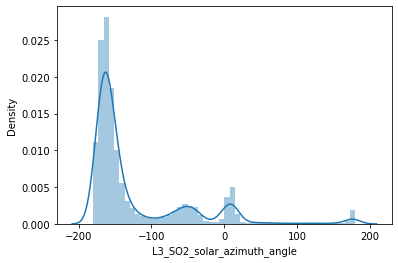

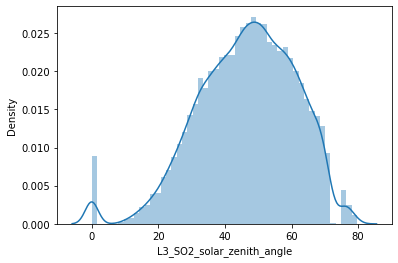

In [12]:
# Float type
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col]) # Courbe de distribution

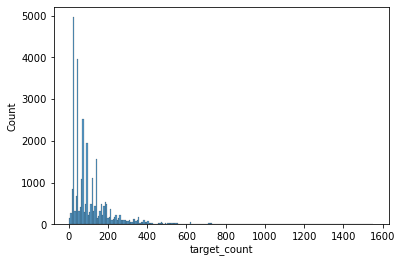

In [13]:
# Float type
for col in df.select_dtypes('int'):
    sns.histplot(df[col]) # Courbe de distribution

In [14]:
train = train[train.columns[train.isna().sum()/train.shape[0] < 0.8]]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [15]:
test = test[test.columns[test.isna().sum()/test.shape[0] < 0.8]]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 70 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      16136 non-null  object 
 1   Date                                                 16136 non-null  object 
 2   Place_ID                                             16136 non-null  object 
 3   precipitable_water_entire_atmosphere                 16136 non-null  float64
 4   relative_humidity_2m_above_ground                    16136 non-null  float64
 5   specific_humidity_2m_above_ground                    16136 non-null  float64
 6   temperature_2m_above_ground                          16136 non-null  float64
 7   u_component_of_wind_10m_above_ground                 16136 non-null  float64
 8   v_component_of_wind_10m_above_ground                 16136 non-nul

In [16]:
train.drop(['target_min', 'target_max', 'target_variance', 'target_count'], axis = 1, inplace = True)

/home/fy/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
train

,Place_ID X Date,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,6.700000,68.300003,0.00352,4.256799,-4.810586,-4.195359,...,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,6.300000,77.700005,0.00341,2.067438,-2.346421,0.749136,...,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,7.100000,68.500000,0.00356,4.438623,0.095703,0.141943,...,48.459205,0.000107,0.263715,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,19.100000,66.300003,0.00523,10.573236,0.434940,-1.439778,...,47.292238,0.000014,0.546447,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537


In [18]:
y_train = train['target']
train.drop('target', axis = 1, inplace = True)
y_train

/home/fy/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0         38.0
1         39.0
2         24.0
3         49.0
4         21.0
         ...  
30552     22.0
30553     53.0
30554     85.0
30555    103.0
30556     89.0
Name: target, Length: 30557, dtype: float64

In [20]:
train['Date'] = train['Date'].apply(lambda x: ( int(x.split('-')[1])+ int(x.split('-')[2])/30 ) if (x == x) else np.nan)
test['Date'] = test['Date'].apply(lambda x: ( int(x.split('-')[1])+ int(x.split('-')[2])/30 ) if (x == x) else np.nan)
train['Date'] = train['Date'].astype('float')
test['Date'] = test['Date'].astype('float')
train

/tmp/ipykernel_7642/2002795275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = train['Date'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])/12 + int(x.split('-')[2])/365 ) if (x == x) else np.nan)
/tmp/ipykernel_7642/2002795275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date'] = test['Date'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])/12 + int(x.split('-')[2])/365 ) if (x == x) else np.nan)
/tmp/ipykernel_7642/2002795275.py:3: SettingWithCopy

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020.088813,010Q650,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020.091553,010Q650,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,2020.094292,010Q650,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,010Q650 X 2020-01-05,2020.097032,010Q650,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,010Q650 X 2020-01-06,2020.099772,010Q650,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020.291096,YWSFY6Q,6.700000,68.300003,0.00352,4.256799,-4.810586,-4.195359,0.000063,...,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571
30553,YWSFY6Q X 2020-03-16,2020.293836,YWSFY6Q,6.300000,77.700005,0.00341,2.067438,-2.346421,0.749136,0.000072,...,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531
30554,YWSFY6Q X 2020-03-17,2020.296575,YWSFY6Q,7.100000,68.500000,0.00356,4.438623,0.095703,0.141943,0.000068,...,48.459205,0.000107,0.263715,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205
30555,YWSFY6Q X 2020-03-18,2020.299315,YWSFY6Q,19.100000,66.300003,0.00523,10.573236,0.434940,-1.439778,0.000086,...,47.292238,0.000014,0.546447,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537


In [21]:
X_train = train.drop(['Place_ID X Date', 'Place_ID'], axis = 1)
X_test = test.drop(['Place_ID X Date', 'Place_ID'], axis = 1)
X_train

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,2020.088813,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,2020.091553,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,2020.094292,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,2020.097032,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,2020.099772,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,2020.291096,6.700000,68.300003,0.00352,4.256799,-4.810586,-4.195359,0.000063,0.000165,-1.412609,...,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571
30553,2020.293836,6.300000,77.700005,0.00341,2.067438,-2.346421,0.749136,0.000072,0.000161,-1.449760,...,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531
30554,2020.296575,7.100000,68.500000,0.00356,4.438623,0.095703,0.141943,0.000068,0.000135,-1.722480,...,48.459205,0.000107,0.263715,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205
30555,2020.299315,19.100000,66.300003,0.00523,10.573236,0.434940,-1.439778,0.000086,0.000148,-2.065102,...,47.292238,0.000014,0.546447,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537


In [22]:
num = X_train.select_dtypes('float')
num_test = X_test.select_dtypes('float')

#for col in num.columns:
    #mode = X_train[col].mode()[0]
    #X_train[col] = X_train[col].fillna(mode)
    #X_test[col] = X_train[col].fillna(mode)

## Scaling data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scale = StandardScaler()

In [25]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [26]:
X_train=pd.DataFrame(X_train,columns=num.columns,index=num.index)
X_test=pd.DataFrame(X_test,columns=num_test.columns,index=num_test.index)

In [27]:
X_train['Place_ID X Date'] = train['Place_ID X Date']
X_test['Place_ID X Date'] = test['Place_ID X Date']
X_train['Place_ID'] = train['Place_ID']
X_test['Place_ID'] = test['Place_ID']
X_test

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,Place_ID X Date,Place_ID
0,-1.697562,-0.346387,-2.145558,-0.505485,0.571063,1.307076,0.236240,-0.435247,-0.508535,2.553672,...,1.409468,0.908675,2.548472,-1.150985,1.076594,-1.801402,0.385358,-1.616555,0OS9LVX X 2020-01-02,0OS9LVX
1,-1.661121,0.280461,-1.470298,-0.014353,0.610635,1.408279,0.217045,-0.466524,-0.500158,1.440921,...,0.991058,-0.108464,1.556445,-1.095702,1.179787,-0.050075,0.398847,-1.918249,0OS9LVX X 2020-01-03,0OS9LVX
2,-1.624680,0.214969,-1.555370,-0.027555,0.662491,1.783212,0.587488,-0.467523,-0.266443,1.374480,...,0.946537,0.539782,1.734356,-1.308984,1.174726,1.069984,0.412745,-2.219627,0OS9LVX X 2020-01-04,0OS9LVX
3,-1.588239,-0.027168,-0.927963,0.286664,0.548055,1.860124,-0.105613,-0.418090,-0.080597,1.351172,...,1.061623,0.605330,1.715520,-0.961033,-1.166792,1.244183,0.367800,-0.945830,0OS9LVX X 2020-01-05,0OS9LVX
4,-1.551797,-0.524150,0.055682,0.548073,0.275600,1.142896,-0.139267,-0.417144,-0.299667,2.544751,...,0.984380,0.200922,2.593824,-1.083210,-1.164802,0.281456,0.384352,-1.248012,0OS9LVX X 2020-01-06,0OS9LVX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,1.576077,-0.552218,0.831966,-0.494924,-0.661987,-0.126838,0.315930,-1.004244,-1.505452,1.790640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZZDJZMS X 2020-03-31,ZZDJZMS
16132,1.591260,0.158833,1.049963,-0.138456,-0.313264,-0.603607,0.447341,-1.004244,-1.505452,1.790640,...,-0.782592,1.812729,-0.017285,1.393844,0.138290,1.096657,2.359490,-0.419160,ZZDJZMS X 2020-04-01,ZZDJZMS
16133,1.627702,0.361917,0.831966,0.146718,0.045974,-0.305578,0.252047,-1.004244,-1.505452,1.790640,...,1.054295,-0.168800,-1.021730,1.046905,-1.132199,-0.448504,-0.397468,-0.365313,ZZDJZMS X 2020-04-02,ZZDJZMS
16134,1.664143,-0.645777,-0.220802,-0.378742,-0.106900,0.458855,-0.969045,-1.004244,-1.505452,1.790640,...,-1.703119,-0.189420,2.746887,-1.354014,0.179956,-1.877671,1.720067,-3.188577,ZZDJZMS X 2020-04-03,ZZDJZMS


In [28]:
cols = train.columns
X_train = X_train.reindex(train.columns, axis=1)
X_train.head(4)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,-1.697562,010Q650,-0.402523,-0.550456,0.537511,0.984205,0.583280,-0.498085,-0.217287,...,-1.846090,-0.266326,-0.463059,-0.431453,0.117310,-1.354014,1.187682,0.158382,0.861373,-1.656185
1,010Q650 X 2020-01-03,-1.661121,010Q650,-0.065709,-1.156595,0.629929,1.415508,1.075924,-0.483214,-0.193813,...,-1.408491,0.041870,0.018792,0.110901,0.694883,-0.977766,-0.013699,1.267962,0.778762,-1.227847
2,010Q650 X 2020-01-04,-1.624680,010Q650,0.102698,-1.975414,0.394925,1.895489,1.716741,1.291532,-0.294273,...,-1.011070,0.041648,-0.286868,0.127276,0.524890,-0.834503,-1.205189,0.751724,0.630681,-0.838496
3,010Q650 X 2020-01-05,-1.588239,010Q650,-0.784999,-2.618771,-0.553014,1.568062,0.955379,0.382675,-0.124006,...,-1.273462,0.127403,0.616224,0.466746,0.996190,-0.586353,-1.193770,-0.338154,0.692506,-1.095557


In [29]:
cols = test.columns
X_test = X_test.reindex(test.columns, axis=1)
X_test.head(4)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,0OS9LVX X 2020-01-02,-1.697562,0OS9LVX,-0.346387,-2.145558,-0.505485,0.571063,1.307076,0.236240,-0.435247,...,-1.805255,0.120172,1.409468,0.908675,2.548472,-1.150985,1.076594,-1.801402,0.385358,-1.616555
1,0OS9LVX X 2020-01-03,-1.661121,0OS9LVX,0.280461,-1.470298,-0.014353,0.610635,1.408279,0.217045,-0.466524,...,-2.113173,-0.087598,0.991058,-0.108464,1.556445,-1.095702,1.179787,-0.050075,0.398847,-1.918249
2,0OS9LVX X 2020-01-04,-1.624680,0OS9LVX,0.214969,-1.555370,-0.027555,0.662491,1.783212,0.587488,-0.467523,...,-2.420826,0.079277,0.946537,0.539782,1.734356,-1.308984,1.174726,1.069984,0.412745,-2.219627
3,0OS9LVX X 2020-01-05,-1.588239,0OS9LVX,-0.027168,-0.927963,0.286664,0.548055,1.860124,-0.105613,-0.418090,...,-1.120615,0.098115,1.061623,0.605330,1.715520,-0.961033,-1.166792,1.244183,0.367800,-0.945830


## Model selection

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
#Linear = LinearRegression()
#Linear.fit(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1),y_train)    #fit the model to the data
#y_pred=Linear.predict(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1))  #predict using the model
#y_pred

In [32]:
#score = r2_score(y_train,y_pred)
#print('r2 socre = ',score)
#print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_train,y_pred)))

## Random forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
Forest = RandomForestRegressor()

In [35]:
#Forest.fit(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1),y_train)

In [36]:
#forest_pred=Forest.predict(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1))

In [37]:
#score = r2_score(y_train,forest_pred)
#print('r2 socre = ',score)
#print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_train,forest_pred)))

## XGBoost

In [38]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [39]:
XGB = CatBoostRegressor(verbose = 2)

In [40]:
XGB.fit(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1), y_train)

Learning rate set to 0.070279
0:	learn: 45.9248578	total: 74.4ms	remaining: 1m 14s
2:	learn: 44.2713949	total: 106ms	remaining: 35.4s
4:	learn: 42.9524950	total: 142ms	remaining: 28.3s
6:	learn: 41.8644257	total: 180ms	remaining: 25.5s
8:	learn: 40.8778880	total: 228ms	remaining: 25.1s
10:	learn: 40.0857775	total: 260ms	remaining: 23.4s
12:	learn: 39.4080665	total: 291ms	remaining: 22.1s
14:	learn: 38.7831010	total: 322ms	remaining: 21.1s
16:	learn: 38.2824142	total: 352ms	remaining: 20.3s
18:	learn: 37.8776270	total: 386ms	remaining: 19.9s
20:	learn: 37.4864428	total: 431ms	remaining: 20.1s
22:	learn: 37.1052039	total: 491ms	remaining: 20.8s
24:	learn: 36.7887953	total: 535ms	remaining: 20.8s
26:	learn: 36.5200233	total: 577ms	remaining: 20.8s
28:	learn: 36.2356931	total: 622ms	remaining: 20.8s
30:	learn: 36.0191054	total: 666ms	remaining: 20.8s
32:	learn: 35.8120421	total: 697ms	remaining: 20.4s
34:	learn: 35.6215360	total: 727ms	remaining: 20s
36:	learn: 35.3982997	total: 759ms	rema

314:	learn: 27.8600523	total: 5.86s	remaining: 12.7s
316:	learn: 27.8255225	total: 5.9s	remaining: 12.7s
318:	learn: 27.7943464	total: 5.93s	remaining: 12.7s
320:	learn: 27.7715325	total: 5.96s	remaining: 12.6s
322:	learn: 27.7438872	total: 6s	remaining: 12.6s
324:	learn: 27.7210584	total: 6.03s	remaining: 12.5s
326:	learn: 27.6997936	total: 6.05s	remaining: 12.5s
328:	learn: 27.6646246	total: 6.1s	remaining: 12.4s
330:	learn: 27.6300941	total: 6.14s	remaining: 12.4s
332:	learn: 27.6057454	total: 6.18s	remaining: 12.4s
334:	learn: 27.5732776	total: 6.23s	remaining: 12.4s
336:	learn: 27.5452175	total: 6.27s	remaining: 12.3s
338:	learn: 27.5142581	total: 6.32s	remaining: 12.3s
340:	learn: 27.4834452	total: 6.36s	remaining: 12.3s
342:	learn: 27.4439811	total: 6.4s	remaining: 12.3s
344:	learn: 27.4153624	total: 6.43s	remaining: 12.2s
346:	learn: 27.3876363	total: 6.46s	remaining: 12.2s
348:	learn: 27.3666183	total: 6.49s	remaining: 12.1s
350:	learn: 27.3349927	total: 6.52s	remaining: 12.1s

630:	learn: 24.3726555	total: 12.3s	remaining: 7.21s
632:	learn: 24.3483486	total: 12.4s	remaining: 7.2s
634:	learn: 24.3280509	total: 12.5s	remaining: 7.17s
636:	learn: 24.3121223	total: 12.5s	remaining: 7.13s
638:	learn: 24.2935758	total: 12.6s	remaining: 7.1s
640:	learn: 24.2733996	total: 12.6s	remaining: 7.07s
642:	learn: 24.2535778	total: 12.7s	remaining: 7.05s
644:	learn: 24.2415704	total: 12.8s	remaining: 7.02s
646:	learn: 24.2231139	total: 12.8s	remaining: 6.99s
648:	learn: 24.2092004	total: 12.9s	remaining: 6.96s
650:	learn: 24.1932800	total: 12.9s	remaining: 6.94s
652:	learn: 24.1788034	total: 13s	remaining: 6.91s
654:	learn: 24.1656267	total: 13s	remaining: 6.87s
656:	learn: 24.1519004	total: 13.1s	remaining: 6.83s
658:	learn: 24.1354331	total: 13.1s	remaining: 6.8s
660:	learn: 24.1171381	total: 13.2s	remaining: 6.76s
662:	learn: 24.1080578	total: 13.2s	remaining: 6.72s
664:	learn: 24.0943863	total: 13.3s	remaining: 6.68s
666:	learn: 24.0696026	total: 13.3s	remaining: 6.64s


944:	learn: 22.0883130	total: 18.7s	remaining: 1.09s
946:	learn: 22.0794735	total: 18.7s	remaining: 1.05s
948:	learn: 22.0652364	total: 18.8s	remaining: 1.01s
950:	learn: 22.0547917	total: 18.8s	remaining: 969ms
952:	learn: 22.0440545	total: 18.9s	remaining: 930ms
954:	learn: 22.0333532	total: 18.9s	remaining: 890ms
956:	learn: 22.0231903	total: 18.9s	remaining: 850ms
958:	learn: 22.0126895	total: 19s	remaining: 811ms
960:	learn: 22.0001401	total: 19s	remaining: 771ms
962:	learn: 21.9859550	total: 19s	remaining: 732ms
964:	learn: 21.9735907	total: 19.1s	remaining: 692ms
966:	learn: 21.9570768	total: 19.1s	remaining: 652ms
968:	learn: 21.9449001	total: 19.2s	remaining: 613ms
970:	learn: 21.9314195	total: 19.2s	remaining: 573ms
972:	learn: 21.9198723	total: 19.2s	remaining: 534ms
974:	learn: 21.9048901	total: 19.3s	remaining: 494ms
976:	learn: 21.8912796	total: 19.3s	remaining: 455ms
978:	learn: 21.8814441	total: 19.3s	remaining: 415ms
980:	learn: 21.8704683	total: 19.4s	remaining: 375ms

In [41]:
y_test = XGB.predict(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1))

In [42]:
score = r2_score(y_train,y_test)
print('r2 socre = ',score)
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_train,y_test)))

r2 socre =  0.7843417733823181
Root Mean Squared Error:  21.761574896817603


# Model optimization

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'n_estimators': [25, 50], 'max_features': [16,18, 20]}

#grid = GridSearchCV(Forest, param_grid, cv=5, verbose=2)

#grid.fit(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1), y_train)

In [45]:
#final_model = grid.best_estimator_
#final_model

In [46]:
#final_model.fit(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1),y_train)

In [47]:
#pred=final_model.predict(X_train.drop(['Place_ID X Date', 'Place_ID'], axis = 1))

In [48]:
#score = r2_score(y_train,pred)
#print('r2 socre = ',score)
#print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_train,pred)))

# Submission

In [49]:
target = XGB.predict(X_test.drop(['Place_ID X Date', 'Place_ID'], axis = 1))
target

array([57.05098211, 27.38627276, 49.07648799, ..., 45.90563736,
       49.65549879, 53.88559979])

In [50]:
submission = X_test[['Place_ID X Date']]
submission['target'] = target

/tmp/ipykernel_7642/106391708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['target'] = target


In [51]:
submission

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,57.050982
1,0OS9LVX X 2020-01-03,27.386273
2,0OS9LVX X 2020-01-04,49.076488
3,0OS9LVX X 2020-01-05,37.983119
4,0OS9LVX X 2020-01-06,29.838105
...,...,...
16131,ZZDJZMS X 2020-03-31,57.488983
16132,ZZDJZMS X 2020-04-01,60.170390
16133,ZZDJZMS X 2020-04-02,45.905637
16134,ZZDJZMS X 2020-04-03,49.655499


In [52]:
submission.to_csv('submissionCat2.csv', index=False)

In [53]:
response = pd.read_csv('submissionCat2.csv')
response

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,57.050982
1,0OS9LVX X 2020-01-03,27.386273
2,0OS9LVX X 2020-01-04,49.076488
3,0OS9LVX X 2020-01-05,37.983119
4,0OS9LVX X 2020-01-06,29.838105
...,...,...
16131,ZZDJZMS X 2020-03-31,57.488983
16132,ZZDJZMS X 2020-04-01,60.170390
16133,ZZDJZMS X 2020-04-02,45.905637
16134,ZZDJZMS X 2020-04-03,49.655499
